## Cityカテゴリについての分析

In [167]:
%matplotlib inline
import pandas as pd
from copy import deepcopy

In [1]:
# dataset
d = '../data/JP5/dataset/City/'
train = d + 'train.txt'
test = d + 'test.txt'
dev = d + 'dev.txt'

In [168]:
with open(train, 'r') as f:
    content = f.read().split('\n\n')
train_content = deepcopy(content)
with open(dev, 'r') as f:
    content += f.read().split('\n\n')
with open(test, 'r') as f:
    content += f.read().split('\n\n')

In [56]:
def to_sentence_only(morphs):
    return [m.split('\t')[0] for m in morphs.split('\n')]

def to_label_only(morphs):
    return [m.split('\t')[-1] for m in morphs.split('\n')]

In [157]:
sentences = list(map(to_sentence_only, content))
labels = list(map(to_label_only, content))
sentence_lens = list(map(len, sentences))

In [158]:
len(sentence_lens)

479667

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x178f5cb38>]],
      dtype=object)

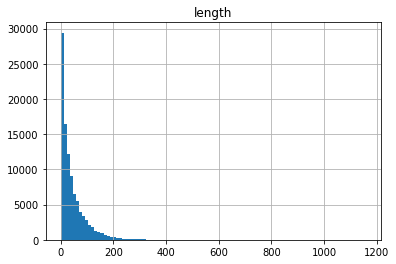

In [160]:
df = pd.DataFrame(sentence_lens, columns=['length'])
df[:100000].hist(bins=100)

In [161]:
df.describe()

,length
count,479667.000000
mean,43.298090
std,50.425015
min,1.000000
25%,8.000000
50%,26.000000
75%,60.000000
max,2623.000000


In [162]:
df.sort_values('length', ascending=False)[:10]

,length
300867,2623
154703,1389
90927,1157
67197,924
327774,922
358858,859
67253,794
188140,782
312750,775
190106,759


### 単語数が26以下の文は固有表現を含んでいない

In [163]:
under_two_six = df[df.length <= 26].index.tolist()
under_two_seven = df[df.length <= 27].index.tolist()

In [164]:
print(any([len(list(set(labels[i]))) != 1 for i in under_two_six]))
print(any([len(list(set(labels[i]))) != 1 for i in under_two_seven])) 

False
True


### 単語数が48以上の文は固有表現を含んでいない

In [165]:
upper_four_seven = df[df.length >= 47].index.tolist()
upper_four_eight = df[df.length >= 48].index.tolist()

In [166]:
print(any([len(list(set(labels[i]))) != 1 for i in upper_four_seven]))
print(any([len(list(set(labels[i]))) != 1 for i in upper_four_eight]))

True
False


### 結果，約380,000文中，約71,000文を学習データに使えば良さそう

In [170]:
train_sentences = list(map(to_sentence_only, train_content))
train_sentence_lens = list(map(len, train_sentences))
train_df = pd.DataFrame(train_sentence_lens, columns=['length'])

In [171]:
print(train_df.count())
print(train_df[train_df.length >= 27][train_df.length <= 48].count())

length    383733
dtype: int64
length    71055
dtype: int64


/Users/rikeda/Development/Shinra/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
